<div style="display: flex; align-items: center;">
    <img src="static/logo_rs.png" width="120" height="120">
    <h1> Progetto SMDA - User interest Recommendation System </h1>
</div>

<p>
    Questo sistema di raccomandazione è frutto delle conoscenze acquisite al corso di Social Media Data Analisys AA 2023-2024. Si pone come obiettivo quello di "Raccomandare" persone simili tra loro in base ai dati presi in esame.
</p>

<h2>Indice</h2>
<ol>
    <li><a href="#teoria">Teoria</a>
    <li><a href="#introduzione">Introduzione ai dati</a>
    <li><a href="#analisi">Analisi dei dati</a>
    <li><a href="#sistema">Sistema di raccomandazione</a>
    <li><a href="#risultati">Risultati</a>
    <li><a href="#conclusione">Conclusione</a>
</ol>

<section id="teoria">
    <h1>1. Teoria</h1>
</section>

<section id="introduzione">
    <h1>2. Introduzione ai dati</h1>
</section>

<p>
I dati utilizzati per questo sistema sono stati ottenuti da un dataset esistente acquisito da Kaggle. I dati sono stati precedentemente puliti e organizzati secondo le necessità del progetto. Il dataset originale conteneva valori di analisi effettuati dagli aiutori, che sono stati rimossi poiché non inerenti al lavoro svolto in questo progetto.
</p>
<p>
Il sistema di raccomandazione che segue è un sistema Collaborative Filtering di tipo User-User.
</p>
<p>
Il dataset contiene le seguenti colonne:
<ul>
    <li><b>Gender</b>: Genere dell' utente: Uomo (0) - Donna (1)</li>
    <li><b>Age</b>: Età dell'utente<//li>
    <li><b>Field</b>: Campo professionale</li>
    <li><b>From</b>: Provenienza</li>
    <li><b>Income</b>: Reddito</li>
    <li><b>Career</b>: Occupazione lavorativa</li>
</ul>
<p>
I seguenti campi riguardano le valutazioni in scala da 0 a 10 date dagli utenti su l'importanza di alcune caratteristiche di un possibile partner
</p>
<ul>
    <li><b>Attr</b>: Importanza Attrattività</li>              
    <li><b>Sinc</b>: Importanza Sincerità </li>
    <li><b>Intel</b>: Importanza Intelligenza</li>
    <li><b>Fun</b>: Importanza Simpatia</li>
    <li><b>Amb</b>: Importanza Ambizione</li>
    <li><b>Shar</b>: Importanza Condivisione degli stessi interessi</li>
</ul>
<p>
I seguenti campi invece riguardano gli interessi in alcuni ambiti da parte degli utenti, anche questi valutati da una scala di importanza che va da 0 a 10
</p>
<ul>
    <li><b>Sports</b>: Quanto è importante praticare sport? </li>
    <li><b>Exercise</b>: Quanto ti piace fare esercizio fisico?</li>
    <li><b>Dining</b>: Quanto ti piace cenare fuori?</li>
    <li><b>Museums</b>: Quanto ti piace partecipare a mostre o eventi?</li>
    <li><b>Art</b>: Quanto ti piace l'arte?</li>
    <li><b>Hiking</b>: Quanto è importante fare Hiking?</li>
    <li><b>Gaming</b>: Quanto ti piacciono i videogiochi?</li>
    <li><b>Clubbing</b>: Quanto ti piace andare a ballare in discoteca?</li>
    <li><b>Reading</b>: Quanto ti piace leggere?</li>
    <li><b>Tv</b>: Quanto ti piace guardare la tv?</li>
    <li><b>Theater</b>: Quanto ti piace andare al cinema</li>
    <li><b>Movies</b>: Quanto ti piace guardare film?</li>
    <li><b>Concerts</b>: Quanto ti piace andare ai concerti?</li>
    <li><b>Music</b>: Quanto ti piace la musica?</li>
    <li><b>Shopping</b>:Quanto ti piace andare a fare shopping?</li>
    <li><b>Yoga</b>: Quanto ti piace fare Yoga?</li>
</ul>
</p>

In [121]:
import pandas as pd

#caricamento del dataset
path = 'datasets/data.csv'
data = pd.read_csv(path)

print("INFORMAZIONI SUL DATASET")
print("-----------------------------------------")
data_info = data.info()
print("-----------------------------------------")

INFORMAZIONI SUL DATASET
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   age       8283 non-null   float64
 2   field     8315 non-null   object 
 3   from      8299 non-null   object 
 4   income    4279 non-null   object 
 5   career    8289 non-null   object 
 6   attr      8176 non-null   float64
 7   sinc      8101 non-null   float64
 8   intel     8082 non-null   float64
 9   fun       8028 non-null   float64
 10  amb       7666 non-null   float64
 11  shar      7311 non-null   float64
 12  sports    8299 non-null   float64
 13  exercise  8299 non-null   float64
 14  dining    8299 non-null   float64
 15  museums   8299 non-null   float64
 16  art       8299 non-null   float64
 17  hiking    8299 non-null   float64
 18  gaming    8299 non-null   float64
 19  cl

<section id="analisi">
    <h1>3. Analisi dei dati</h1>
</section>

## Preprocessing dei dati

In questa sezione effettueremo un preprocessing ai dati, andando ad eliminare le colonne superflue e normalizzando e standardizzando i dati del dataset.

### Rimozione colonne

In [122]:
#Rimozione colonne 'income' e 'from'
data.drop(columns=['income', 'from'], inplace=True)

In [123]:
#Salvataggio in un nuovo file
data.to_csv('datasets/normalized_data_no_outliers.csv', index=False)

### Normalizzazione dei dati

In [124]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')

# Esclusione delle colonne 'age' e 'gender' dalla normalizzazione
columns_to_standardize = data.select_dtypes(include=['number']).columns.drop(['age', 'gender'])

# Rimozione degli outlier utilizzando il metodo IQR
Q1 = data[columns_to_standardize].quantile(0.25)
Q3 = data[columns_to_standardize].quantile(0.75)
IQR = Q3 - Q1

# Definizione dei limiti per considerare un valore un outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtraggio dei dati per rimuovere gli outlier
data_no_outliers = data[~((data[columns_to_standardize] < lower_bound) | 
                          (data[columns_to_standardize] > upper_bound)).any(axis=1)]

# Inizializzazione dello StandardScaler per la standardizzazione Z-score
scaler = StandardScaler()

# Applicazione della standardizzazione
data_no_outliers.loc[:, columns_to_standardize] = scaler.fit_transform(data_no_outliers[columns_to_standardize])

# Salvataggio del DataFrame normalizzato
data_no_outliers.to_csv('datasets/normalized_data_no_outliers.csv', index=False)


## Clustering
In questa sezione effettuaremo il clustering dei dati, utilizzando l'algoritmo K-Means in combinazione con la PCA.


### Assunzioni:

<b>Cluster 0 :</b>
 Rappresenta persone con forti interessi accademici, orientati a studi specifici come il diritto o le scienze del clima. Questi individui tendono ad avere profili di attrattiva e sincerità variabili, ma condividono abitudini simili nelle attività culturali.

<b>Cluster 1 :</b>
Sembra includere persone con preferenze equilibrate per attività culturali, sociali e intellettuali. Questo cluster potrebbe rappresentare individui più coinvolti socialmente e con interessi ampi, ma provenienti da background simili a quelli del Cluster 0.

<b>Cluster 2 :</b>
Questo cluster sembra rappresentare persone più coinvolte nel mondo economico o finanziario, con una propensione a bilanciare intelligenza, divertimento e preferenze per attività legate al benessere e al consumismo.

##### In base alla nostra analisi, il basso score di Silhouette potrebbe essere attribuito alla provenienza dei dati all'interno del dataset, che potrebbe aver introdotto eterogeneità o caratteristiche non ben separate tra i cluster. Tra i vari tentativi effettuati non si è riuscito ad ottenere uno score miglior di 0.357.     Considerando che il valore iniziale era di 0.12, che con i vari aggiustamente fatti nella scelta dei cluster e delle componenti principali il suo valore è quasi triplicato. 

Silhouette Scores: [np.float64(0.33856243239546974), np.float64(0.3576704273257263), np.float64(0.3281885586379125), np.float64(0.3032717674359067), np.float64(0.33446710111108285), np.float64(0.32199210658676686), np.float64(0.32925690373962185), np.float64(0.3164570770641248), np.float64(0.32641195458704897)]


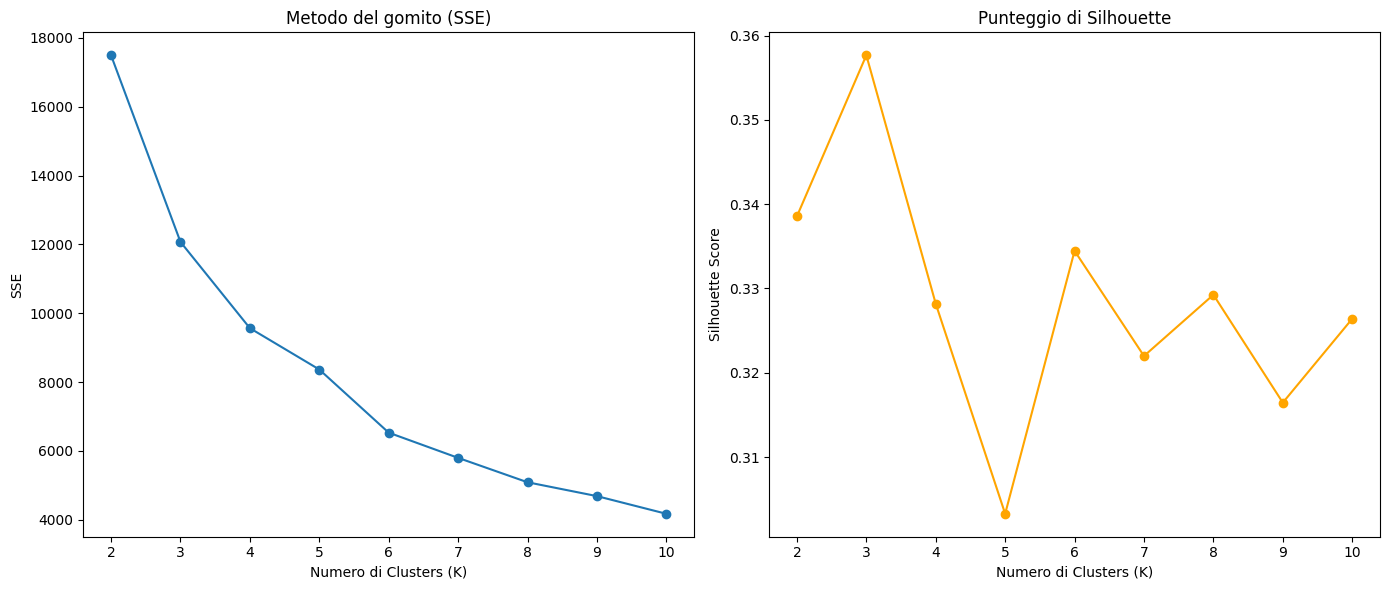

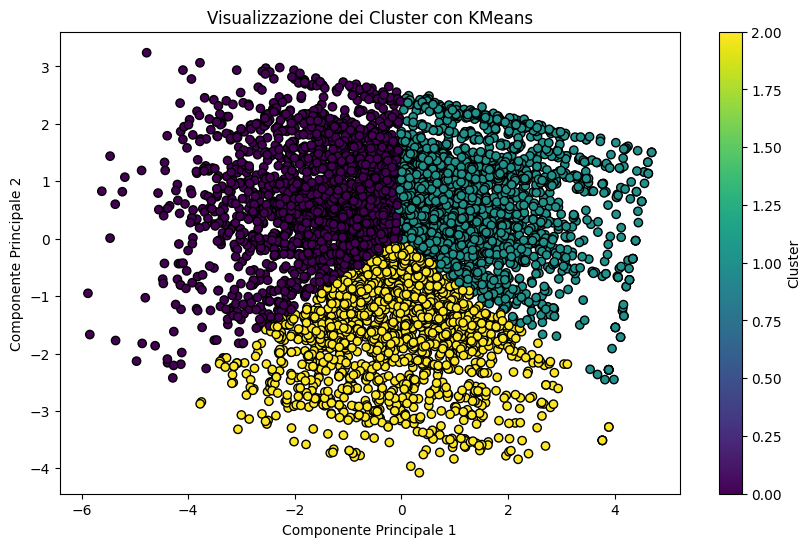

Cluster 0:
      gender   age             field  \
0          0  24.0               law   
2          0  24.0               law   
5          0  24.0               law   
8          0  24.0               law   
25         0  23.0               Law   
...      ...   ...               ...   
7266       1  25.0  Climate Dynamics   
7275       1  25.0  Climate Dynamics   
7276       1  25.0  Climate Dynamics   
7277       1  25.0  Climate Dynamics   
7285       1  25.0  Climate Dynamics   

                                                 career      attr      sinc  \
0                                                   law -0.664763 -0.186087   
2                                                   law -0.664763  0.445534   
5                                                   law  0.933251 -0.186087   
8                                                   law  0.400580 -0.817707   
25                                   lawyer/policy work -0.664763  1.708775   
...                               

In [125]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('datasets/normalized_data_no_outliers.csv')
data = data.dropna()  # Rimozione delle righe con valori NaN

# Colonne potenzialmente più influenti all'interno del set di dati
columns_to_standardize = ['art', 'reading', 'attr', 'museums', 'sinc', 'fun', 'amb', 'shar']

# Standardizzazione dei dati
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_standardize])

# Test del numero di componenti PCA
n_components_pca =2  
pca = PCA(n_components=n_components_pca)
pca_data = pca.fit_transform(scaled_data)

# Inizializzazione delle metriche per la valutazione del clustering
sse = []
silhouette_scores = []
k_range = range(2, 11)

# Test dei k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, labels))

print("Silhouette Scores:",silhouette_scores)

# Plot delle metriche
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].plot(k_range, sse, marker='o')
axs[0].set_title('Metodo del gomito (SSE)')
axs[0].set_xlabel('Numero di Clusters (K)')
axs[0].set_ylabel('SSE')

axs[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axs[1].set_title('Punteggio di Silhouette')
axs[1].set_xlabel('Numero di Clusters (K)')
axs[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Applicazione del K-Means con best k 
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans_model.fit_predict(pca_data)

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title(f'Visualizzazione dei Cluster con KMeans')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.colorbar(label='Cluster')
plt.show()

# Stampa del contenuto dei cluster
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(data[data['cluster'] == cluster])
    print("\n")


<section id="sistema">
    <h1>4. Sistema di raccomandazione</h1>
</section>
In questa sezione vedremo la creazione del sistema di raccomandazione, andando a definire i metodi necessari affinchè il sistema effettui delle raccomandazioni nel migliore dei modi.

In [149]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardizzazione dei dati dell'utente e confronto con il dataset esistente
def standardize_user_input(user_input, scaler, columns_to_standardize):
    # Converti l'input dell'utente in un DataFrame con i nomi delle colonne corrispondenti
    user_input_df = pd.DataFrame([user_input], columns=columns_to_standardize)
    
    # Standardizza i dati dell'utente
    standardized_input = scaler.transform(user_input_df)
    return standardized_input

# Funzione di raccomandazione
def recommend_similar_users(data, columns_to_standardize, top_n=5):
    # Domande
    new_user = input(f"Inserisci il tuo nome: ")
    print("Per favore inserisci i valori (da 0 a 1) per le seguenti domande:")
    user_input = []
    for feature in columns_to_standardize:
        value = float(input(f"Inserisci un valore per {feature} (da 0 a 1): "))
        user_input.append(value)
    
    # Standardizzazione dei dati dell'utente
    scaler = StandardScaler()
    scaler.fit(data[columns_to_standardize])  # Fit sui dati
    standardized_user_input = standardize_user_input(user_input, scaler, columns_to_standardize)
    
    # Calcola similarità del coseno tra l'utente e gli altri utenti
    similarity_matrix = cosine_similarity(standardized_user_input, data[columns_to_standardize])

    # Conversione della similarità in DataFrame
    similarity_df = pd.DataFrame(similarity_matrix, index=[new_user], columns=data.index)
    
    # Ordinamento degli utenti più simili
    similar_users = similarity_df.loc[new_user].sort_values(ascending=False)
    
    # Top N utenti simili
    return similar_users.head(top_n)

# Applicazione della funzione per raccomandare utenti
recommended_users = recommend_similar_users(data, columns_to_standardize)
print(f"Raccomandazioni per l'utente inserito:")
print(recommended_users)


Per favore inserisci i valori (da 0 a 1) per le seguenti domande:
Raccomandazioni per l'utente inserito:
6478    0.977526
1470    0.966935
4553    0.956352
1460    0.955218
4798    0.949981
Name: Mirko, dtype: float64


<section id="risultati">
    <h1>5. Risultati</h1>
</section>

## Root Mean Square Error

In [145]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Funzione per calcolare RMSE
def calculate_rmse(true_ratings, predicted_ratings):
    return np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

# Funzione per calcolare MAE
def calculate_mae(true_ratings, predicted_ratings):
    return mean_absolute_error(true_ratings, predicted_ratings)

# Supponiamo di avere due array, uno con le valutazioni vere e uno con quelle previste
# Esempio: valutazioni effettive e predizioni da parte del sistema di raccomandazione
true_ratings = np.array([4, 3, 5, 2, 1])
predicted_ratings = np.array([3.8, 3.1, 4.9, 2.5, 1.3])

# Calcola del RMSE
rmse = calculate_rmse(true_ratings, predicted_ratings)
print(f"RMSE: {rmse}")

# Calcolo del MAE
mae = calculate_mae(true_ratings, predicted_ratings)
print(f"MAE: {mae}")


RMSE: 0.282842712474619
MAE: 0.24


## Precision & Recall

In [146]:
from sklearn.metrics import precision_score, recall_score

# Funzione per valutare precisione e richiamo
def evaluate_precision_recall(true_labels, predicted_labels):
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    return precision, recall

# Supponiamo di avere dati binari (0 o 1) per rappresentare il comportamento reale e quello previsto
# Esempio: 1 se l'utente ha cliccato/ha gradito un prodotto, 0 altrimenti
true_labels = np.array([1, 0, 1, 1, 0, 0, 1])
predicted_labels = np.array([1, 0, 1, 0, 0, 1, 1])

# Calcola precisione e richiamo
precision, recall = evaluate_precision_recall(true_labels, predicted_labels)
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.75
Recall: 0.75


<section id="conclusione">
    <h1>6. Conclusione</h1>
</section>